<a href="https://colab.research.google.com/github/yusufdimari/deep_learning/blob/main/emotion_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np

In [5]:
# Load the facial expression data
faces = np.load('Facial expression.npy')
labels = np.load('Facial expression label.npy')

# Check the shape of the data
print(f"Faces shape: {faces.shape}")
print(f"Labels shape: {labels.shape}")


Faces shape: (19950, 48, 48, 3)
Labels shape: (19950, 4)


In [6]:
# Convert to grayscale by selecting one channel
faces_gray = faces[..., 0]  # Extract the first channel

# Normalize the pixel values to the range [0, 1]
faces_gray = faces_gray / 255.0

# Check shape and range
print(f"Normalized data shape: {faces_gray.shape}")
print(f"Pixel range: min={faces_gray.min()}, max={faces_gray.max()}")


Normalized data shape: (19950, 48, 48)
Pixel range: min=0.0, max=1.0


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train,y_temp=train_test_split(faces_gray,labels,test_size=0.2,random_state=42)
X_val, X_test, y_val, y_test=train_test_split(X_temp,y_temp,test_size=0.5,random_state=42)
print(f"Training data: {X_train.shape}, {y_train.shape}")
print(f"Validation data: {X_val.shape}, {y_val.shape}")
print(f"Test data: {X_test.shape}, {y_test.shape}")

Training data: (15960, 48, 48), (15960, 4)
Validation data: (1995, 48, 48), (1995, 4)
Test data: (1995, 48, 48), (1995, 4)


In [8]:
X_train=X_train[...,np.newaxis]
X_val=X_val[...,np.newaxis]
X_test=X_test[...,np.newaxis]
# Verify the new shapes
print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (15960, 48, 48, 1)
Validation data shape: (1995, 48, 48, 1)
Test data shape: (1995, 48, 48, 1)


In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model=models.Sequential([
    layers.Input(shape=(48,48,1)), #Input Layer
    layers.Conv2D(32,(3,3), activation='relu'), # First convolutional layer
    layers.MaxPooling2D((2,2)),  # First pooling layer
    layers.Conv2D(64, (3, 3), activation='relu'),  # Second convolutional layer
    layers.MaxPooling2D((2, 2)),  # Second pooling layer
    layers.Conv2D(128, (3, 3), activation='relu'),  # Third convolutional layer
    layers.Flatten(),  # Flatten the 3D output to 1D for the dense layer
    layers.Dense(128, activation='relu'),  # Fully connected (dense) layer
    layers.Dense(4, activation='softmax')  # Output layer with 4 classes
])

In [11]:
#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
history=model.fit(X_train,y_train,epochs=20,batch_size=64, validation_data=(X_val,y_val))

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 58s 230ms/step - accuracy: 0.4525 - loss: 1.2078 - val_accuracy: 0.6040 - val_loss: 0.9671
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 77s 212ms/step - accuracy: 0.6240 - loss: 0.9250 - val_accuracy: 0.6662 - val_loss: 0.8436
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 54s 215ms/step - accuracy: 0.6830 - loss: 0.7999 - val_accuracy: 0.6932 - val_loss: 0.7807
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 80s 209ms/step - accuracy: 0.7253 - loss: 0.6975 - val_accuracy: 0.7013 - val_loss: 0.7584
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 209ms/step - accuracy: 0.7578 - loss: 0.6279 - val_accuracy: 0.7118 - val_loss: 0.7443
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 208ms/step - accuracy: 0.7879 - loss: 0.5628 - val_accuracy: 0.7203 - val_loss: 0.7409
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 207ms/step - accuracy: 0.8142 - loss: 0.5099 - val_accuracy: 0.7263 - val_loss: 0.7298
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 84s 215ms/step - accuracy: 0.8352 - loss: 0

In [15]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.7225 - loss: 1.7508
Test Accuracy: 0.7168


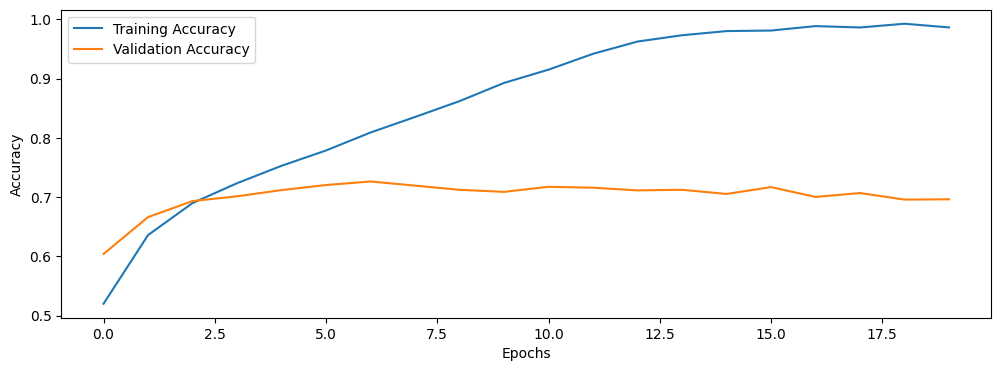

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [18]:
model.save('Facial_expression_model.h5')
model.save_weights('Facial_expression.weights.h5')